In [1]:
import numpy as np
import pandas as pd
import ast
import matplotlib.pyplot as plt
import json
%matplotlib inline

In [2]:
categories = sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .flatMap(lambda x: x['categories'])\
    .flatMap(lambda x: x)\
    .map(lambda x: (x, 1))\
    .reduceByKey(lambda x, y: x + y)\
    .collect()
    
categories

[('Christian', 33477),
 ('', 194914),
 ('Specific Demographics', 779),
 ('Single Cards', 8894),
 ('Coach & Referee Gear', 598),
 ('Action Figures & Statues', 48885),
 ('Tejano', 785),
 ('Cake Stands & Carriers', 944),
 ('Upright Bass', 142),
 ('Billiards', 75),
 ('Car CD Visors', 139),
 ('Metalworking & Multipurpose Drill Bits', 201),
 ('Feeders', 2663),
 ('Oil Drains', 106),
 ('Opener Systems', 211),
 ('Rangefinder Cameras', 19),
 ('Essays & Correspondence', 1035),
 ('Sinking Lures', 48),
 ('Floating Lures', 83),
 ('Syrups, Sugars & Sweeteners', 234),
 ('Diving Gloves', 156),
 ('Pitons & Aid Gear', 17),
 ('Walker Accessories', 388),
 ('Gelatin', 14),
 ('Vitamin K', 63),
 ('Curio Cabinets', 178),
 ('Active Vests', 171),
 ('In-Ground', 58),
 ('Tetra Pond Equipment', 2),
 ('Top Clearance Marker Assemblies', 36),
 ('Surfing Fins', 236),
 ('Suspense', 26412),
 ('Dill Pickles', 21),
 ('Water Helmets', 34),
 ('Bushings & Bushed Bearings', 75),
 ('Countertop Vanity Mirrors', 30),
 ('Hydraulic

In [15]:
sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .filter(lambda x: x['categories'][0][0] == 'Electronics')\
    .take(10)

[{'asin': '0132793040',
  'categories': [['Electronics',
    'Computers & Accessories',
    'Cables & Accessories',
    'Monitor Accessories']],
  'description': 'The Kelby Training DVD Mastering Blend Modes in Adobe Photoshop CS5 with Corey Barker is a useful tool for becoming familiar with the use of blend modes in Adobe Photoshop. For those who are serious about mastering all that Photoshop has to offer, mastering blend modes is just as important as mastering layers.In this DVD tutorial, seasoned expert Corey Barker explores the function of blend modes in a variety of scenarios such as image restoration, sharpening, adjustments, special effects and much more. Since every project scenario is different, Corey encourages you to experiment with these blend modes by giving you the skills and confidence you need.',
  'imUrl': 'http://ecx.images-amazon.com/images/I/31JIPhp%2BGIL.jpg',
  'title': 'Kelby Training DVD: Mastering Blend Modes in Adobe Photoshop CS5 By Corey Barker'},
 {'asin': 

In [12]:
df = pd.DataFrame(categories)
df.columns = ['category', 'count']
df.sort_values('count', ascending=False).head(200).values

array([['Clothing, Shoes & Jewelry', 3429257],
       ['Books', 2855890],
       ['CDs & Vinyl', 1523001],
       ['Women', 1101694],
       ['Kindle Store', 1088341],
       ['Kindle eBooks', 910900],
       ['Clothing', 693990],
       ['Literature & Fiction', 582755],
       ['Sports & Outdoors', 566811],
       ['Men', 560377],
       ['Novelty, Costumes & More', 537761],
       ['Electronics', 502540],
       ['Home & Kitchen', 450633],
       ['Shoes', 432826],
       ['Accessories', 407797],
       ['Pop', 378962],
       ['Cell Phones & Accessories', 357697],
       ['Novelty', 340337],
       ['Toys & Games', 336460],
       ['Automotive', 333164],
       ['Digital Music', 281157],
       ['Cases', 280265],
       ['Tools & Home Improvement', 269850],
       ['Shoes & Accessories: International Shipping Available', 268065],
       ['Health & Personal Care', 263163],
       ['Beauty', 259246],
       ['Jewelry', 256933],
       ['Romance', 256004],
       ['Computers & Accessor

In [16]:
categories_macro = sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .flatMap(lambda x: x['categories'])\
    .map(lambda x: x[0])\
    .map(lambda x: (x, 1))\
    .reduceByKey(lambda x, y: x + y)\
    .collect()
    
categories_macro

[('', 194914),
 ('Christian', 9564),
 ('Buy a Kindle', 1895),
 ('Patio, Lawn & Garden', 109117),
 ('Amazon Instant Video', 30648),
 ('Blues', 1322),
 ('Office & School Supplies', 3316),
 ('Publishers', 2),
 ('Folk', 2976),
 ('Automotive', 331484),
 ('Grocery & Gourmet Food', 171760),
 ('Amazon Fashion', 24145),
 ('Rock', 4864),
 ('Books', 2855617),
 ('Rap & Hip-Hop', 936),
 ('Baby Products', 10165),
 ('GPS & Navigation', 361),
 ('Amazon Fire TV', 3),
 ('Luxury Beauty', 1926),
 ('Video Games', 74342),
 ('Entertainment', 6),
 ('All Electronics', 7571),
 ('Nickelodeon', 2),
 ('Appstore for Android', 152),
 ('Gift Cards Store', 5),
 ('Classic Rock', 359),
 ('Kitchen & Dining', 3751),
 ('Davis', 59),
 ('Microsoft', 4),
 ('#508510', 1),
 ('Kindle Store', 1088341),
 ('Jazz', 3974),
 ('Cell Phones & Accessories', 357693),
 ('Collectibles & Fine Art', 6117),
 ('R&B', 2556),
 ('Digital Music', 281157),
 ('Toys & Games', 336460),
 ('Gospel', 1647),
 ('Learning & Education', 1),
 ("Children's Musi

In [148]:
df = pd.DataFrame(categories_macro)
df.columns = ['category', 'count']
df.sort_values('count', ascending=False)

,category,count
49,"Clothing, Shoes & Jewelry",3429257
13,Books,2855617
66,CDs & Vinyl,1523001
30,Kindle Store,1088341
72,Sports & Outdoors,543514
73,Electronics,500600
52,Home & Kitchen,437019
32,Cell Phones & Accessories,357693
36,Toys & Games,336460
9,Automotive,331484


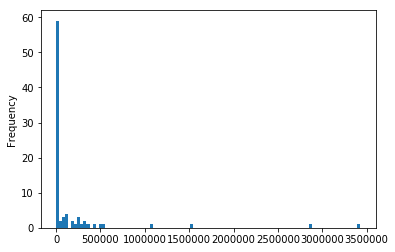

In [49]:
import json
import pyspark.sql.functions as func

sc.textFile(r'C:\Spinn3r\amazon\reviews_sample.json.gz')\
    .map(lambda x: json.loads(x))\
    .map(lambda x: (x['asin'], x['overall'], x['helpful'][0], x['helpful'][1]))\
    .toDF(['asin', 'overall', 'helpful', 'not_helpful'])\
    .groupBy('asin')\
    .agg(
        func.mean('overall').alias('average_rating'),
        func.count('overall').alias('num_reviews'),
        (func.sum('helpful') / func.sum('not_helpful')).alias('helpful_fraction')
    )\
    .toJSON()\
    .coalesce(1)\
    .saveAsTextFile('aggregate_ratings.json')

In [2]:
def convert_to_trie(elements):
    root = {}
    node = root
    for element in elements:
        node[element] = ({}, 1)
        node = node[element][0]
    return root
    

In [3]:
def merge_tries(a, b):
    for key in b:
        if key in a:
            a[key] = (a[key][0], a[key][1] + b[key][1])
            merge_tries(a[key][0], b[key][0])
        else:
            a[key] = b[key]
    return a

In [125]:
a = convert_to_trie(['a', 'x', 'y'])
b = convert_to_trie(['a', 'b'])
merge_tries(a, b)

{'a': ({'b': ({}, 1), 'x': ({'y': ({}, 1)}, 1)}, 2)}

In [66]:
trie = {}
merge_tries(trie, convert_to_trie(['a']))
print(trie)
merge_tries(trie, convert_to_trie(['b']))
print(trie)
merge_tries(trie, convert_to_trie(['a', 'aa', 'aaa']))
print(trie)

{'a': {}}
{'a': {}, 'b': {}}
{'a': {'aa': {'aaa': {}}}, 'b': {}}


In [126]:
# all categories
category_tree = sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .flatMap(lambda x: x['categories'])\
    .map(convert_to_trie)\
    .reduce(merge_tries)

In [4]:
# first category
category_tree = sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .map(lambda x: x['categories'][0])\
    .map(convert_to_trie)\
    .reduce(merge_tries)

In [21]:
category_tree['Musical Instruments'][0].keys()

dict_keys(['Instrument Accessories', 'Studio Recording Equipment', 'Wind & Woodwind Instruments', 'Microphones & Accessories', 'Amplifiers & Effects', 'DJ, Electronic Music & Karaoke', 'Band & Orchestra', 'Live Sound & Stage', 'Keyboards', 'Bass Guitars', 'Drums & Percussion', 'Guitars', 'Stringed Instruments'])

In [142]:
sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .map(lambda x: (x['asin'], x['categories']))\
    .flatMapValues(lambda x: x)\
    .filter(lambda x: len(x[1]) == 1 and x[1][0] == 'Computers')\
    .take(1)

[('0321732960', ['Computers'])]

In [143]:
sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: x['asin'] == '0321732960')\
    .take(1)

[{'asin': '0321732960',
  'categories': [['Computers']],
  'imUrl': 'http://ecx.images-amazon.com/images/I/31IlLImCVJL.jpg',
  'price': 34.38,
  'related': {'buy_after_viewing': ['0321501926',
    '0321703561',
    '0321725549',
    '0321819586']},
  'salesRank': {'Electronics': 197743},
  'title': 'Kelby Training DVD: The Adobe Photoshop CS5 7-Point System for Camera Raw By Scott Kelby'}]

In [35]:
import copy
tree = copy.deepcopy(category_tree)

def prune(cat):
    del_list = []
    for key in cat:
        if cat[key][1] < 10:
            del_list.append(key)
        else:
            prune(cat[key][0])
    for key in del_list:
        del cat[key]
            
prune(tree)

In [19]:
category_tree['Cell Phones & Accessories'][0]

{'Accessories': ({'Accessory Kits': ({}, 26545),
   'Audio Adapters': ({}, 497),
   'Batteries': ({'Battery Charger Cases': ({}, 555),
     'External Battery Packs': ({}, 2053),
     'Internal Batteries': ({}, 6645)},
    9842),
   'Bluetooth Speakers': ({}, 779),
   'Car Accessories': ({'Car Cradles & Mounts': ({'Car Cradles': ({}, 424),
       'Car Mounts': ({}, 4183)},
      4699),
     'Car Kits': ({}, 841),
     'Car Speakerphones': ({}, 297)},
    5837),
   'Chargers': ({'Car Chargers': ({}, 7623),
     'Cell Phone Docks': ({}, 1886),
     'International Chargers': ({}, 161),
     'Solar Chargers': ({}, 275),
     'Travel Chargers': ({}, 6845)},
    17111),
   'Cradles, Mounts & Stands': ({'Stands': ({}, 44)}, 44),
   'Data Cables': ({}, 6647),
   'Headsets': ({'Bluetooth Headsets': ({}, 5033),
     'Wired Headsets': ({}, 5015)},
    10148),
   'Phone Charms': ({}, 3073),
   'Replacement Parts': ({}, 6583),
   'SIM Cards & Tools': ({}, 506),
   'Screen Protectors': ({}, 15865),
 

In [19]:
categories_to_extract = set(['Electronics', 'Cell Phones & Accessories', 'Automotive', 'Tools & Home Improvement', 'Musical Instruments'])

def extract_category(x):
    x['category'] = x['categories'][0]
    del x['categories']
    x['num_reviews'] = 0
    if 'imUrl' in x:
        del x['imUrl']
    return x

ratings = sc.textFile(r'C:\Spinn3r\amazon\aggregate_ratings.json')\
    .map(lambda x: json.loads(x))\
    .map(lambda x: (x['asin'], x))

sc.textFile(r'C:\Spinn3r\amazon\metadata.json')\
    .map(lambda x: ast.literal_eval(x))\
    .filter(lambda x: 'categories' in x)\
    .map(extract_category)\
    .filter(lambda x: x['category'][0] in categories_to_extract)\
    .map(lambda x: (x['asin'], x))\
    .leftOuterJoin(ratings)\
    .map(lambda x: x[1])\
    .map(lambda x: x[0] if x[1] == None else {**x[0], **x[1]})\
    .map(lambda x: json.dumps(x))\
    .saveAsTextFile('reduced.json')

In [24]:
sc.textFile('reduced.json')\
    .filter(lambda x: json.loads(x)['category'][0] == 'Musical Instruments')\
    .coalesce(1)\
    .saveAsTextFile('musical_instruments.json')

In [38]:
all_ratings = sc.textFile('musical_instruments.json')\
    .map(lambda x: json.loads(x))\
    .filter(lambda x: x['num_reviews'] > 10)\
    .map(lambda x: x['average_rating'])\
    .collect()

8304


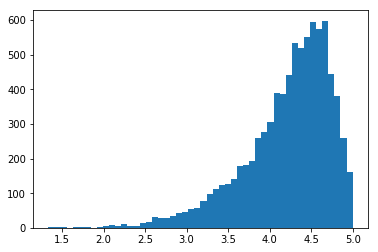

In [44]:
print(len(all_ratings))
_ = plt.hist(all_ratings, bins=50)

In [37]:
with open('categories.json', 'w') as outfile:
    json.dump(tree['Electronics'][0], outfile, sort_keys=True, indent=4, separators=(',', ': '))